<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/ClusterPDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/pda.csv')
df

,Observations / Segmentation Variables,X1-Innovator,X2-Use Message,X3-Use Cell,X4-Use PIM,X5-Inf Passive,X6-Inf Active,X7-Remote Access,X8-Share Inf,X9-Monitor,...,Z8-Professional,Z9-Computers,Z10-PDA,Z11-Cell,Z12-PC,Z13-Away,Z14-Business Week,Z15-PC Magazine,Z16-Field & Stream,Z17-Mgourmet
0,1,4,1,5,7,4,6,3,1,4,...,0,0,1,1,1,3,0,0,0,0
1,2,5,4,7,5,6,5,6,5,4,...,0,0,0,1,1,3,1,0,0,0
2,3,3,5,5,6,3,4,7,6,4,...,0,1,1,1,1,6,0,0,0,0
3,4,3,1,6,7,5,7,3,4,4,...,0,0,1,1,1,7,0,0,0,0
4,5,4,1,6,7,7,5,5,5,2,...,0,1,1,1,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,156,4,2,3,3,7,7,5,4,6,...,0,0,0,0,1,6,0,0,0,0
156,157,1,5,3,1,7,7,1,7,5,...,0,0,0,1,0,6,0,1,0,0
157,158,1,2,3,1,4,7,4,6,4,...,0,0,0,0,1,5,0,0,0,0
158,159,2,3,4,3,6,7,7,6,6,...,0,0,0,1,1,7,0,0,1,0


In [19]:
df2=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,28]]
df2

,X1-Innovator,X2-Use Message,X3-Use Cell,X4-Use PIM,X5-Inf Passive,X6-Inf Active,X7-Remote Access,X8-Share Inf,X9-Monitor,X10-Email,...,Z1-Age,Z2-Education,Z3-Income,Z4-Construction,Z5-Emergency,Z6-Sales,Z7-Service,Z8-Professional,Z9-Computers,Z13-Away
0,4,1,5,7,4,6,3,1,4,5,...,48,3,47,0,0,0,0,0,0,3
1,5,4,7,5,6,5,6,5,4,7,...,43,3,89,0,0,0,1,0,0,3
2,3,5,5,6,3,4,7,6,4,4,...,48,2,24,0,0,0,0,0,1,6
3,3,1,6,7,5,7,3,4,4,4,...,28,3,52,0,0,1,0,0,0,7
4,4,1,6,7,7,5,5,5,2,7,...,54,3,84,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4,2,3,3,7,7,5,4,6,1,...,62,1,67,1,0,0,0,0,0,6
156,1,5,3,1,7,7,1,7,5,4,...,30,2,25,0,0,1,0,0,0,6
157,1,2,3,1,4,7,4,6,4,3,...,23,1,73,0,1,0,0,0,0,5
158,2,3,4,3,6,7,7,6,6,4,...,27,2,31,1,0,0,0,0,0,7


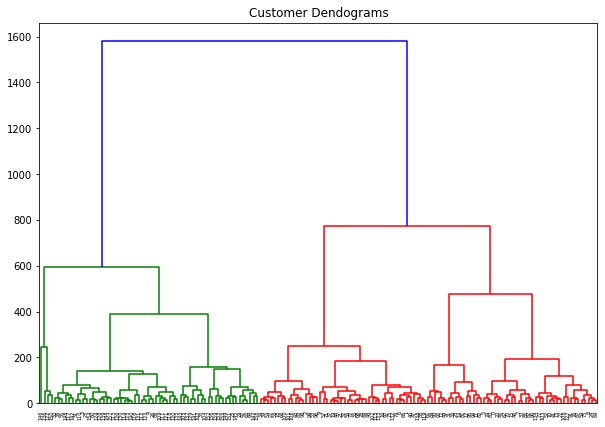

In [20]:
# huge jump in distance is typically what we're interested in
# if we want to argue for a certain number of clusters. 
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df2, method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cl=cluster.fit_predict(df2)


In [41]:
#Centroids
cl2=pd.DataFrame(cl)
oto2=pd.concat([df2,cl2],axis=1)
oto2.groupby(0).mean().T


,0,1,2,3
X1-Innovator,3.142857,3.949153,3.145833,4.50
X2-Use Message,4.653061,3.694915,4.437500,3.50
X3-Use Cell,5.714286,5.423729,5.625000,4.75
X4-Use PIM,4.224490,4.000000,3.812500,3.75
X5-Inf Passive,4.408163,4.355932,4.500000,5.75
X6-Inf Active,4.448980,4.610169,4.416667,4.50
X7-Remote Access,4.285714,3.440678,4.375000,3.75
X8-Share Inf,3.306122,3.813559,3.875000,5.25
X9-Monitor,5.102041,4.423729,4.937500,4.75
X10-Email,4.836735,4.728814,4.583333,5.00


In [42]:
oto2.groupby(0).count()

,X1-Innovator,X2-Use Message,X3-Use Cell,X4-Use PIM,X5-Inf Passive,X6-Inf Active,X7-Remote Access,X8-Share Inf,X9-Monitor,X10-Email,...,Z1-Age,Z2-Education,Z3-Income,Z4-Construction,Z5-Emergency,Z6-Sales,Z7-Service,Z8-Professional,Z9-Computers,Z13-Away
0,,,,,,,,,,,,,,,,,,,,,
0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
1,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
2,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(df2)
# Getting the cluster labels
labels = kmeans.predict(df2)
# Centroid values
centroids = kmeans.cluster_centers_

In [46]:
labels

array([0, 0, 3, 3, 3, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 3, 3, 1, 1, 3, 1, 1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 1, 3, 3,
       0, 0, 0, 0, 0, 1, 3, 3, 1, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 3, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 3, 3, 0, 0, 0, 1, 3, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 0, 1, 3, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [47]:
cl2=pd.DataFrame(labels)
oto2=pd.concat([df2,cl2],axis=1)
oto2.groupby(0).mean().T

,0,1,2,3
X1-Innovator,3.233333,3.066667,3.4,3.933333
X2-Use Message,4.400000,4.800000,3.7,3.800000
X3-Use Cell,5.683333,5.700000,4.4,5.550000
X4-Use PIM,4.000000,4.300000,3.1,4.016667
X5-Inf Passive,4.600000,4.333333,5.7,4.150000
X6-Inf Active,4.483333,4.466667,5.5,4.366667
X7-Remote Access,4.316667,4.333333,3.9,3.500000
X8-Share Inf,3.550000,3.466667,5.4,3.716667
X9-Monitor,4.966667,5.233333,4.7,4.416667
X10-Email,4.800000,4.833333,3.8,4.750000


In [48]:
oto2.groupby(0).count().T

,0,1,2,3
X1-Innovator,60,30,10,60
X2-Use Message,60,30,10,60
X3-Use Cell,60,30,10,60
X4-Use PIM,60,30,10,60
X5-Inf Passive,60,30,10,60
X6-Inf Active,60,30,10,60
X7-Remote Access,60,30,10,60
X8-Share Inf,60,30,10,60
X9-Monitor,60,30,10,60
X10-Email,60,30,10,60
